In [2]:
import tensorflow as tf
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import os

#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

## Define all variables here

In [3]:
HOME_DATA_DIR = "./data"
TRAIN_DATA_DIR = '/train'
TEST_DATA_DIR = '/test'

TRAIN_DATA_PATH = HOME_DATA_DIR + TRAIN_DATA_DIR
TEST_DATA_PATH = HOME_DATA_DIR + TEST_DATA_DIR

#### Read the folders insider the Image directories. These will form the Class names.

In [4]:

train_dir = pathlib.Path(TRAIN_DATA_PATH)
test_dir = pathlib.Path(TEST_DATA_PATH)

folders = list(train_dir.glob("*"))

#### Create Class Names lists

In [5]:
CLASS_NAMES = np.array([folder.name for folder in folders])

CLASS_COUNT = len(CLASS_NAMES)
print("{} classes found: {}".format(CLASS_COUNT,CLASS_NAMES))

2 classes found: ['apple' 'strawberry']


Train Image Count: 360
Test Image Count: 360
Showing files from data\train\apple


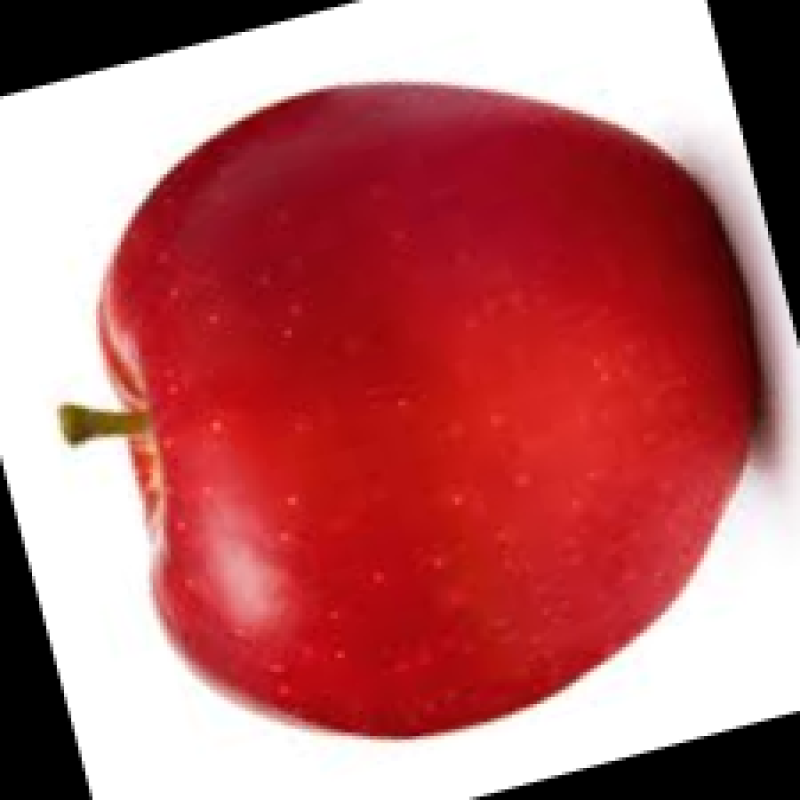

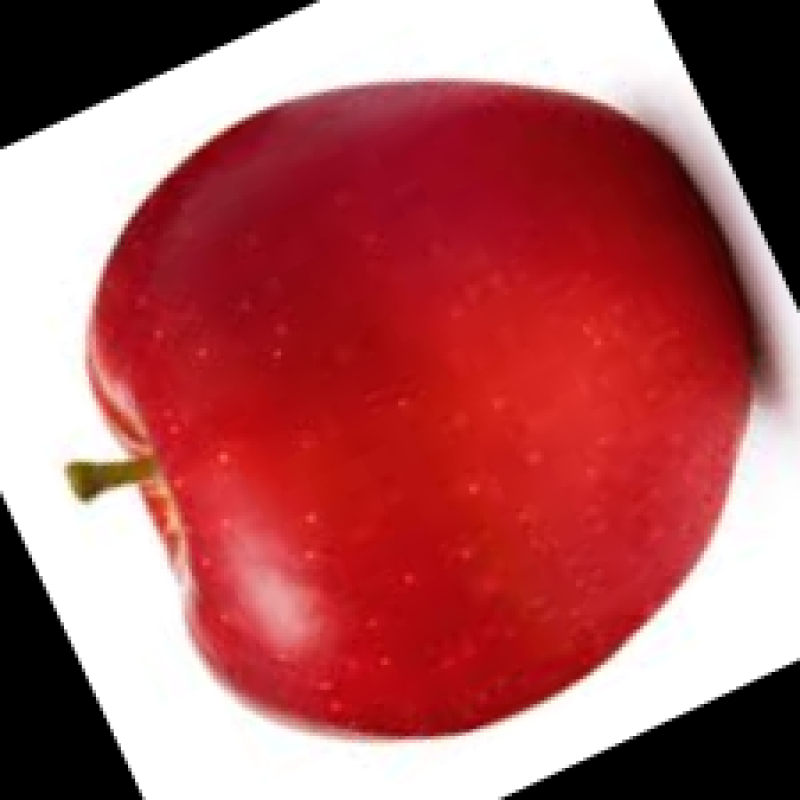

Showing files from data\train\strawberry


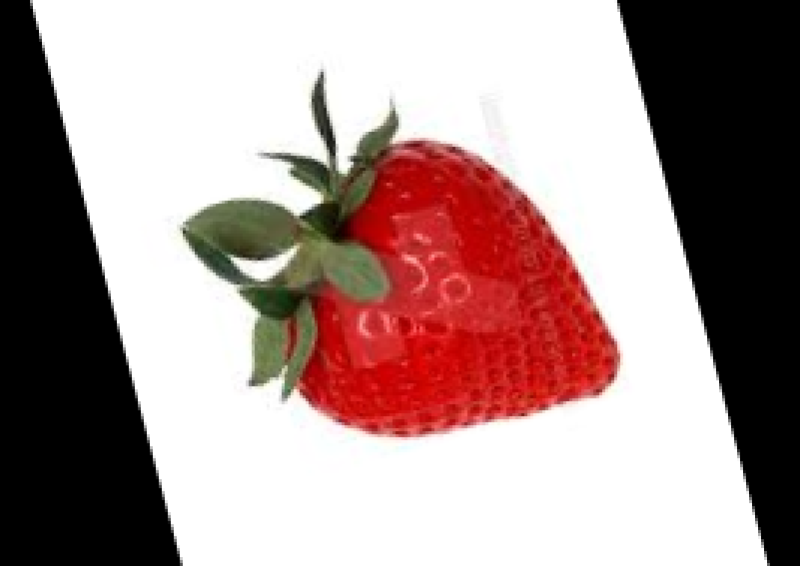

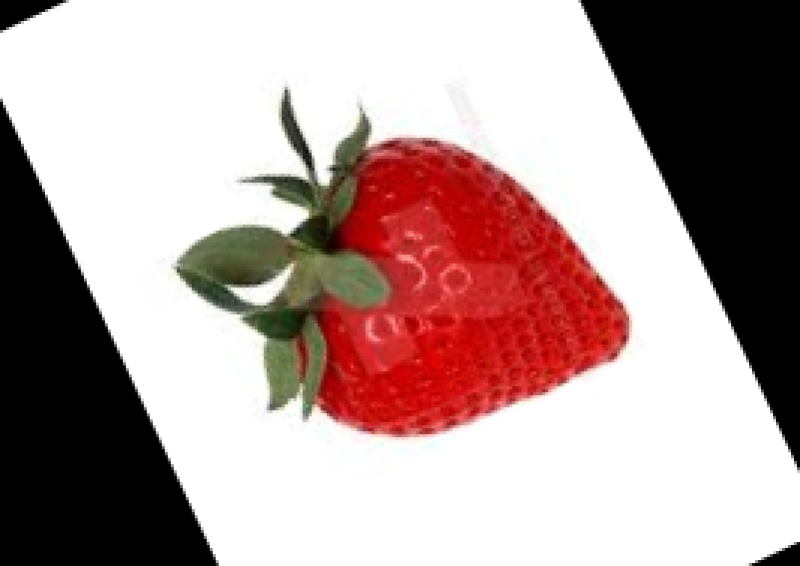

Showing files from data\test\apple


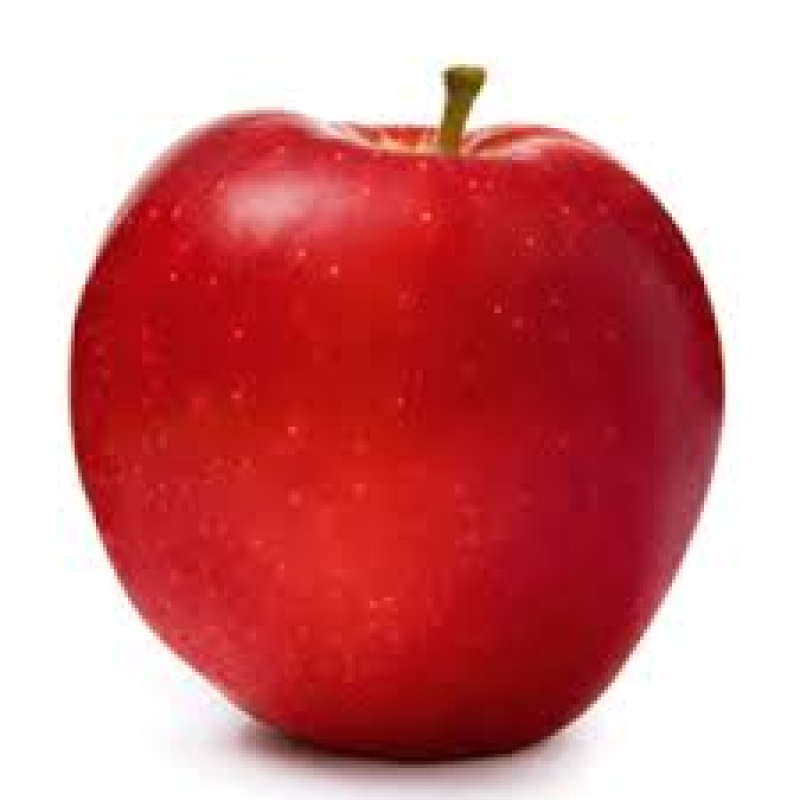

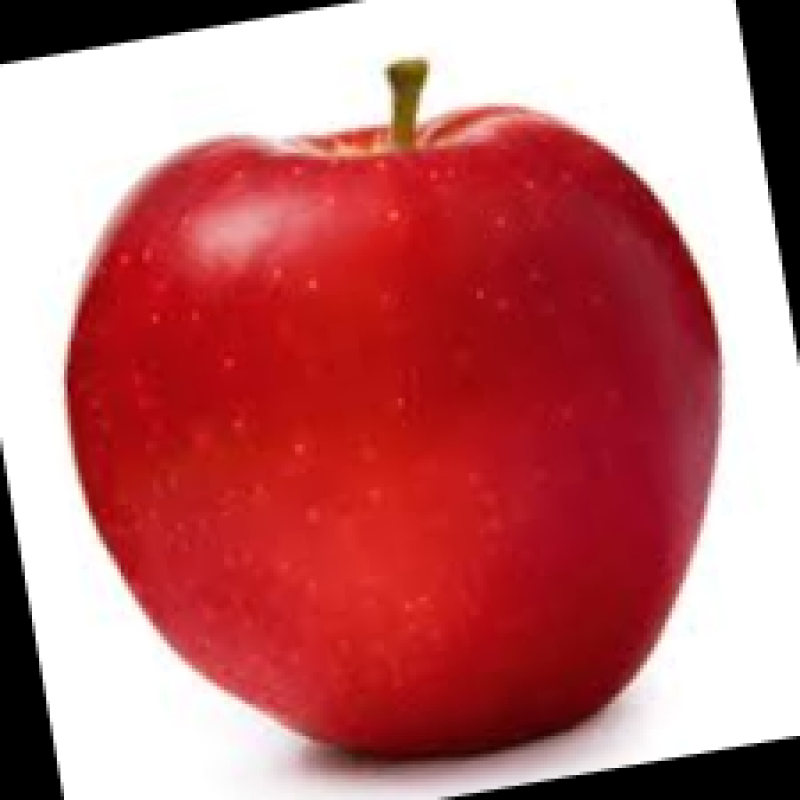

Showing files from data\test\strawberry


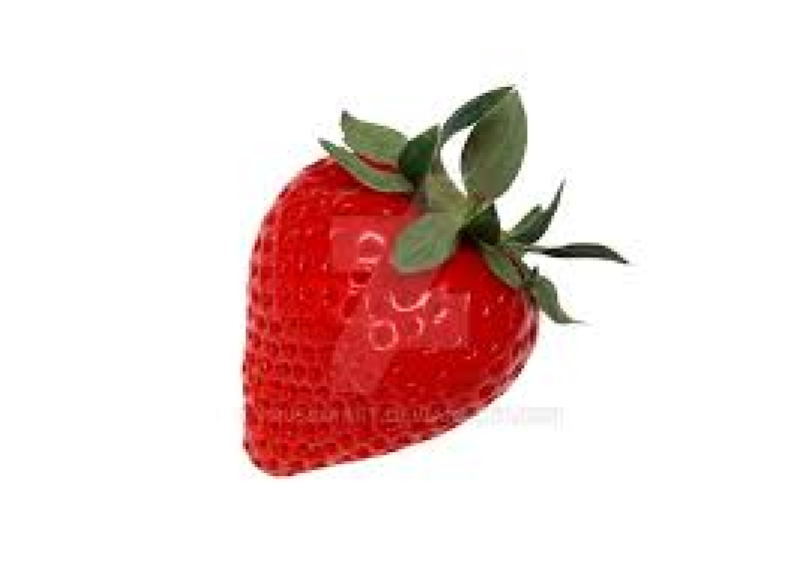

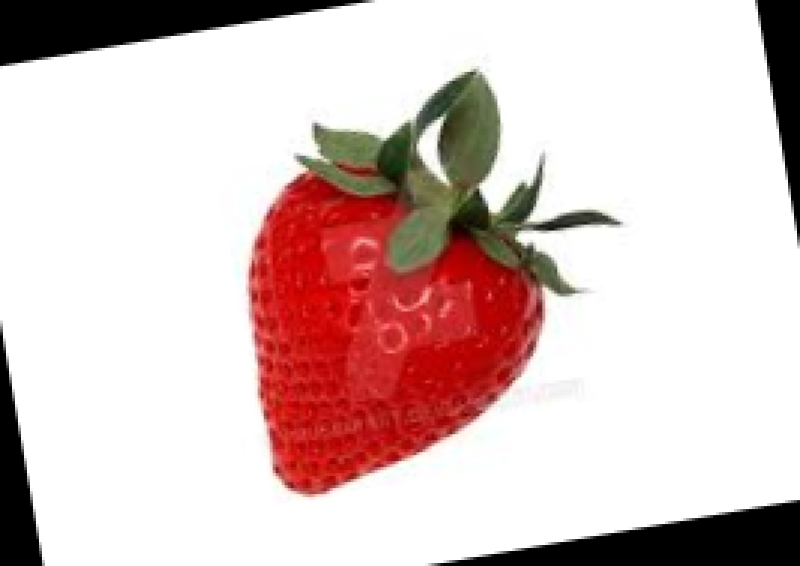

In [6]:
from PIL import Image
import IPython.display as display

train_image_count = len(list(train_dir.glob('*/*.png')))
test_image_count = len(list(test_dir.glob('*/*.png')))

print("Train Image Count: "+ str(train_image_count))
print("Test Image Count: "+ str(test_image_count))

def showFewImagesInAllNestedDir(imgCount, folderPath):
    for folder in list(folderPath.glob('*')):
        print('Showing files from '+str(folder))
        for file in list(folder.glob("*"))[: imgCount]:
            display.display(Image.open(str(file)))

showFewImagesInAllNestedDir(2, train_dir)
showFewImagesInAllNestedDir(2, test_dir)

### Loading the images

#### generating train dataset

In [7]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

TRAIN_BATCH_SIZE = 30
TRAIN_IMG_HEIGHT = 800
TRAIN_IMG_WIDTH = 800
TRAIN_STEPS_PER_EPOCH = np.ceil(train_image_count/TRAIN_BATCH_SIZE)

train_data_gen = train_image_generator.flow_from_directory(directory=str(train_dir),
                                                             batch_size=TRAIN_BATCH_SIZE,
                                                             shuffle=True,
                                                             target_size=(TRAIN_IMG_HEIGHT, TRAIN_IMG_WIDTH),
                                                             classes = list(CLASS_NAMES))
train_image_batch, train_label_batch = next(train_data_gen)


Found 360 images belonging to 2 classes.


#### generating test dataset

In [8]:
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

TEST_BATCH_SIZE = 30
TEST_IMG_HEIGHT = 800
TEST_IMG_WIDTH = 800
TEST_STEPS_PER_EPOCH = np.ceil(test_image_count/TEST_BATCH_SIZE)

test_data_gen = test_image_generator.flow_from_directory(directory=str(test_dir),
                                                     batch_size=TEST_BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(TEST_IMG_HEIGHT,TEST_IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))
test_image_batch, test_label_batch = next(test_data_gen)

Found 360 images belonging to 2 classes.


Generated Training Data Set Batch Sample


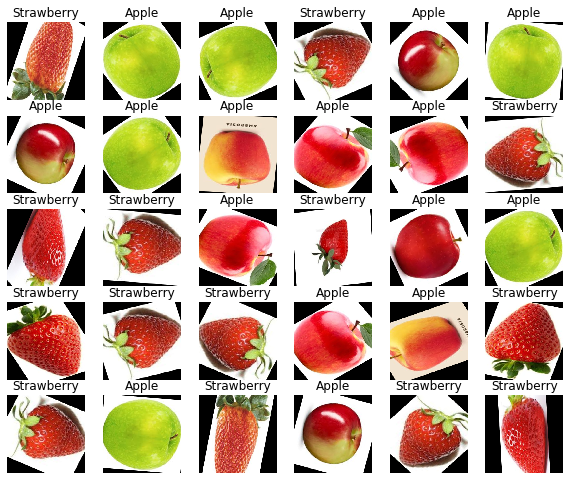

Generated Test Data Set Batch Sample


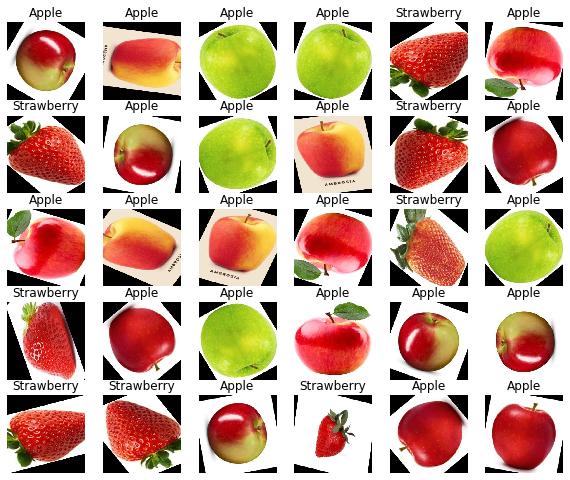

In [9]:
import math

def show_batch(batch_size,image_batch, label_batch):
    subPlotSize = math.ceil(math.sqrt(batch_size))
    plt.figure(figsize=(10,10))
    for n in range(batch_size):
        ax = plt.subplot(subPlotSize,subPlotSize,n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')
    plt.show()

print('Generated Training Data Set Batch Sample')
show_batch(TRAIN_BATCH_SIZE, train_image_batch, train_label_batch)
print('Generated Test Data Set Batch Sample')
show_batch(TEST_BATCH_SIZE, test_image_batch, test_label_batch)

### Creating Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential([
    Conv2D(40, 3, activation="relu", input_shape=(TRAIN_IMG_HEIGHT, TRAIN_IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(40, 3, activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(20, activation='relu'),
    Dense(20, activation='relu'),
    Dense(CLASS_COUNT, activation='sigmoid')
])


model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

### Train the Model

In [ ]:
history = model.fit_generator(
        train_data_gen,
        epochs=7,
        steps_per_epoch=TRAIN_STEPS_PER_EPOCH,
        validation_data=test_data_gen,
        validation_steps=TEST_STEPS_PER_EPOCH
)

# Save the model
model.save('saved_model_v1.h5')